In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
import nbimporter
from functions import *
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import os
import subprocess

In [2]:
D7_dir='/home/mahdi/Desktop/data_selection_D7'
n,name=count(D7_dir)

out_dir='/home/mahdi/Desktop/valid'
n1,name1=count(out_dir)

In [58]:
n

81

# for our net

In [61]:
for i in range(n):
    
    x=(len(name[i][0][:])-7)
    data_dir='/media/mahdi/HD710 PRO/R&d/centerline/'+name1[i][0]+'/output/zero_ref/'+name[i][0][:x]+'_cplus.'+name[i][0][-6:]
    #out='/media/mahdi/HD710 PRO/FSL_result/'+name1[i][0]+'/net'
    #out='/home/mahdi/Desktop'

    subprocess.Popen(['mcflirt','-in',data_dir,'-plots','-refvol','0' ])
    
    

# for sct

In [62]:
for i in range(n):
    
    data_dir='/media/mahdi/HD710 PRO/R&d/valid/'+name1[i][0]+'/sct_seg/'+'fmri_rmvol_moco.nii.gz'
    
    subprocess.Popen(['mcflirt','-in',data_dir,'-plots','-refvol','0'  ])
    

# for main

In [64]:
for i in range(n):
    
    data_dir='/media/mahdi/HD710 PRO/R&d/valid/'+name1[i][0]+'/main_seg/'+name[i][0]
    
    subprocess.Popen(['mcflirt','-in',data_dir,'-plots' ,'-refvol','0' ])
    

# min and max of main volumes

In [3]:
o=np.zeros((81,3))
for i in range(n):
    x=(len(name[i][0][:])-7)
    data_dir='/media/mahdi/HD710 PRO/R&d/centerline/'+name1[i][0]+'/output/zero_ref/'+name[i][0][:x]+'_cplus.'+name[i][0][-6:]
    img = nib.load(data_dir)
    o[i,0]=img.shape[3]         
    o[i,1]=img.shape[2]  
    o[i,2]=name1[i][0]

In [4]:
print('volume=',np.min(o[:,0]))
print('volume=',np.max(o[:,0]))


volume= 153.0
volume= 328.0


In [20]:
sort(o[:,0])

array([153., 153., 153., 153., 153., 153., 153., 153., 153., 153., 153.,
       153., 153., 153., 153., 153., 153., 153., 153., 153., 153., 153.,
       153., 153., 153., 153., 153., 153., 182., 192., 198., 200., 203.,
       205., 206., 208., 211., 212., 213., 214., 216., 216., 217., 219.,
       223., 227., 229., 231., 243., 249., 251., 253., 263., 263., 265.,
       265., 266., 266., 268., 273., 276., 280., 280., 281., 281., 282.,
       283., 283., 285., 285., 285., 286., 291., 292., 293., 294., 295.,
       304., 307., 319., 328.])

In [21]:
o

array([[153.,  10.,  76.],
       [286.,  10.,  70.],
       [249.,  10.,  13.],
       [153.,  10.,  52.],
       [285.,  10.,  32.],
       [153.,  10.,  16.],
       [285.,  10.,  30.],
       [304.,  10.,  39.],
       [203.,  10.,  49.],
       [265.,  10.,  73.],
       [291.,  10.,  21.],
       [153.,  10.,  55.],
       [307.,  10.,  35.],
       [153.,  10.,  27.],
       [153.,  10.,  66.],
       [198.,  10.,  51.],
       [153.,  10.,  14.],
       [294.,  10.,   5.],
       [295.,  10.,  81.],
       [285.,  10.,  75.],
       [319.,  10.,  61.],
       [153.,  10.,  60.],
       [153.,  10.,  63.],
       [280.,  10.,  59.],
       [281.,  10.,  77.],
       [153.,  10.,   7.],
       [153.,  10.,   9.],
       [153.,  10.,  48.],
       [211.,  10.,  56.],
       [292.,  10.,  22.],
       [253.,  10.,  33.],
       [192.,  10.,  44.],
       [200.,  10.,  41.],
       [153.,  10.,  26.],
       [216.,  10.,  36.],
       [153.,  10.,  24.],
       [206.,  10.,  23.],
 

# min and max of sct volume

In [5]:
osct=np.zeros((81,3))
for i in range(n):
    x=(len(name[i][0][:])-7)
    data_dir='/media/mahdi/HD710 PRO/R&d/valid/'+name1[i][0]+'/sct_seg/fmri_rmvol_moco.nii.gz'
    img = nib.load(data_dir)
    osct[i,0]=img.shape[3]         
    osct[i,1]=img.shape[2]  
    osct[i,2]=name1[i][0]

In [6]:
print('volume=',np.min(osct[:,0]))
print('volume=',np.max(osct[:,0]))

volume= 153.0
volume= 328.0


In [7]:
int(o[0,0])

153

In [ ]:
(28/81)*100

In [ ]:
(4/81)*100

In [ ]:
(45/81)*100

In [ ]:
(4/81)*100

# net movement

In [8]:
net_translation=np.zeros((81,328))
net_rotaion=np.zeros((81,328))

for subject in range (n):
    
    x=(len(name[subject][0][:])-7)
    d='/media/mahdi/HD710 PRO/R&d/centerline/'+name1[subject][0]+'/output/zero_ref/'+name[subject][0][:x]+'_cplus_mcf.par'
    movement=pd.read_csv(d, header=None,sep='  ') 
    movement.columns=['x','y','z','xr','yr','zr']
    movement=np.array(movement)
    for volume in range(int(o[subject,0])):
    
        translation=mean(movement[volume][:2])
        rotation=mean(movement[volume][3:])
        
        net_rotaion[subject,volume]=rotation
        net_translation[subject,volume]=translation
    
    

/home/mahdi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


# sct movement

In [9]:
sct_translation=np.zeros((81,328))
sct_rotaion=np.zeros((81,328))

for subject in range (n):
    
    
    d='/media/mahdi/HD710 PRO/R&d/valid/'+name1[subject][0]+'/sct_seg/fmri_rmvol_moco_mcf.par'
    movement=pd.read_csv(d, header=None,sep='  ') 
    movement.columns=['x','y','z','xr','yr','zr']
    movement=np.array(movement)
    for volume in range(int(osct[subject,0])):
    
        translation=mean(movement[volume][:2])
        rotation=mean(movement[volume][3:])
        
        sct_rotaion[subject,volume]=rotation
        sct_translation[subject,volume]=translation

/home/mahdi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


# main movement

In [10]:
main_translation=np.zeros((81,328))
main_rotaion=np.zeros((81,328))

for subject in range (n):
    x=(len(name[subject][0][:])-7)
    d='/media/mahdi/HD710 PRO/R&d/valid/'+name1[subject][0]+'/main_seg/'+name[subject][0][:x]+'_mcf.par'
    movement=pd.read_csv(d, header=None,sep='  ') 
    movement.columns=['x','y','z','xr','yr','zr']
    movement=np.array(movement)
    for volume in range(int(o[subject,0])):
    
        translation=mean(movement[volume][:2])
        rotation=mean(movement[volume][3:])
        
        main_rotaion[subject,volume]=rotation
        main_translation[subject,volume]=translation
    
    

/home/mahdi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [11]:
value_net=[]
for i in range(int(np.min(o[:,0]))):
     value_net.append(np.mean(net_translation[:,i]))  


value_sct=[]
for i in range(int(np.min(osct[:,0]))):
     value_sct.append(np.mean(sct_translation[:,i]))  


value_main=[]
for i in range(int(np.min(o[:,0]))):
     value_main.append(np.mean(main_translation[:,i]))  

############################### full volumes ##############################################
value_net_full=[]
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         value_net_full.append(np.mean(net_translation[:,i]))  
    else:
        zero_net=np.count_nonzero(net_translation[:,i])
        value_net_full.append(np.sum(net_translation[:,i])/(net_translation.shape[0]-zero_net))  
        
        
value_sct_full=[]
for i in range(int(np.max(osct[:,0]))):
    if i<=(int(np.min(osct[:,0]))):
        value_sct_full.append(np.mean(sct_translation[:,i]))     
    else:
        zero_sct=np.count_nonzero(sct_translation[:,i])
        value_sct_full.append(np.sum(sct_translation[:,i])/(sct_translation.shape[0]-zero_sct)) 


value_main_full=[]
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
        value_main_full.append(np.mean(main_translation[:,i]))  
    else:
        zero_main=np.count_nonzero(main_translation[:,i])
        value_main_full.append(np.sum(main_translation[:,i])/(main_translation.shape[0]-zero_main))  
        
        
        
        
        

In [12]:
valuer_net=[]
for i in range(int(np.min(o[:,0]))):
     valuer_net.append(np.mean(net_rotaion[:,i]))  


valuer_sct=[]
for i in range(int(np.min(osct[:,0]))):
     valuer_sct.append(np.mean(sct_rotaion[:,i]))  


valuer_main=[]
for i in range(int(np.min(osct[:,0]))):
     valuer_main.append(np.mean(main_rotaion[:,i]))  

In [13]:
valuer_net_full=[]
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
         valuer_net_full.append(np.mean(net_rotaion[:,i]))  
    else:
        zero_net=np.count_nonzero(net_rotaion[:,i])
        valuer_net_full.append(np.sum(net_rotaion[:,i])/(net_rotaion.shape[0]-zero_net))  
        
        
valuer_sct_full=[]
for i in range(int(np.max(osct[:,0]))):
    if i<=(int(np.min(osct[:,0]))):
        valuer_sct_full.append(np.mean(sct_rotaion[:,i]))     
    else:
        zero_sct=np.count_nonzero(sct_rotaion[:,i])
        valuer_sct_full.append(np.sum(sct_rotaion[:,i])/(sct_rotaion.shape[0]-zero_sct)) 


valuer_main_full=[]
for i in range(int(np.max(o[:,0]))):
    if i<=(int(np.min(o[:,0]))):
        valuer_main_full.append(np.mean(main_rotaion[:,i]))  
    else:
        zero_main=np.count_nonzero(main_rotaion[:,i])
        valuer_main_full.append(np.sum(main_rotaion[:,i])/(main_rotaion.shape[0]-zero_main))  

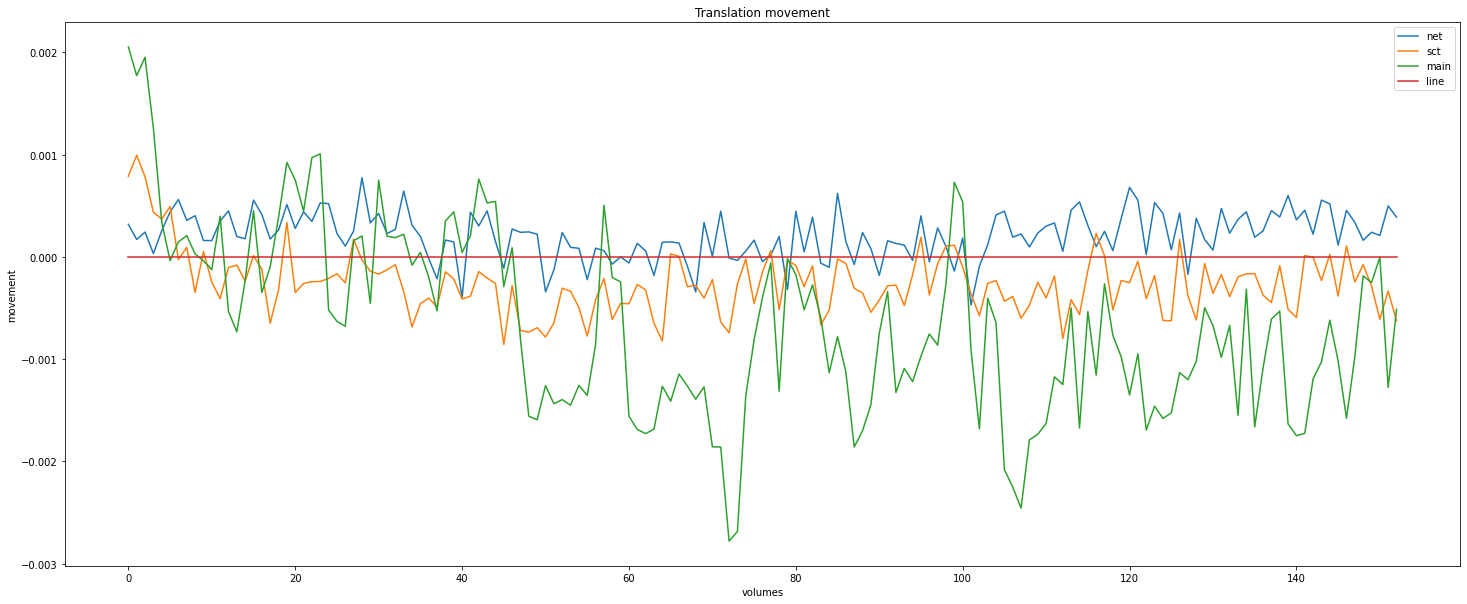

In [14]:

volume=range(int(np.min(osct[:,0]))) 
line=np.zeros(int(np.min(osct[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,value_net,label = 'net')
plt.plot(volume,value_sct,label = 'sct')
plt.plot(volume,value_main,label = 'main')

plt.plot(volume,line,label = 'line')



# naming the x axis
plt.xlabel('volumes')
# naming the y axis
plt.ylabel('movement')
# giving a title to my graph
plt.title('Translation movement')

# show a legend on the plot
plt.legend()


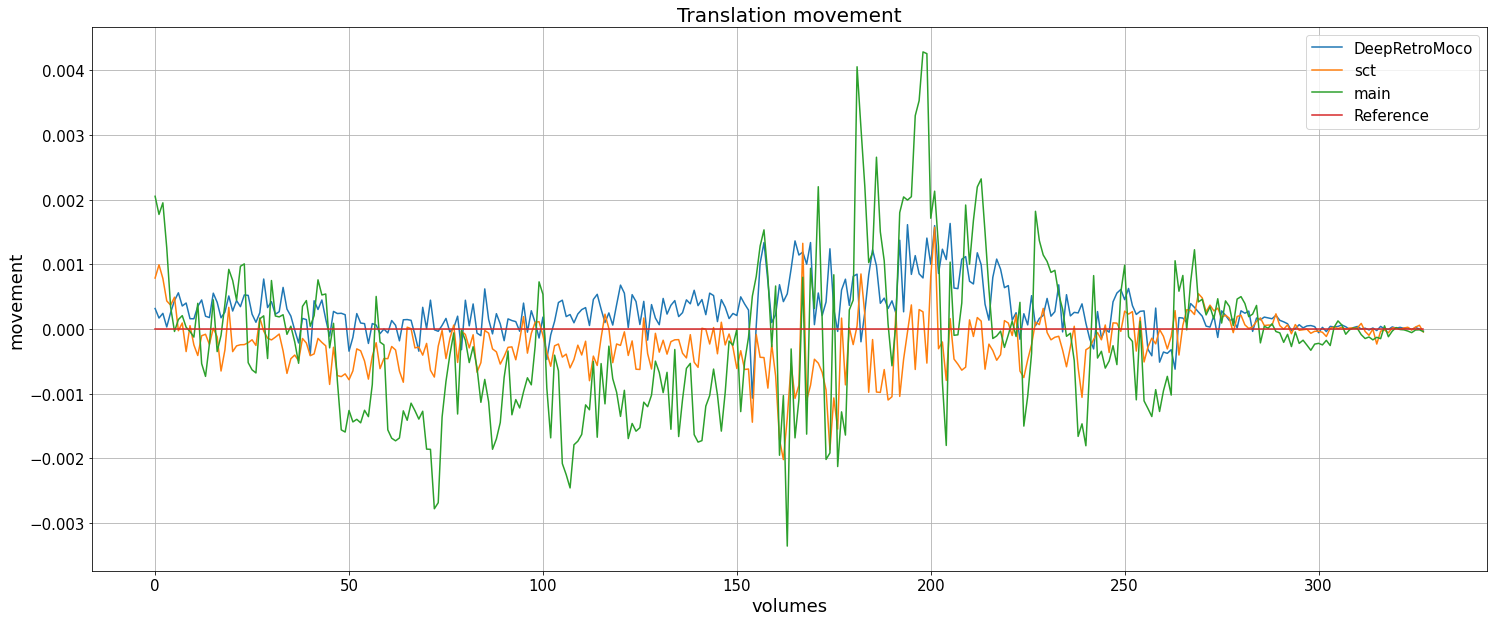

In [55]:
volume=range(int(np.max(osct[:,0]))) 
line=np.zeros(int(np.max(osct[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,value_net_full,label = 'DeepRetroMoco')
plt.plot(volume,value_sct_full,label = 'sct')
plt.plot(volume,value_main_full,label = 'main')

plt.plot(volume,line,label = 'Reference')



# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('movement',fontsize=18)
# giving a title to my graph
plt.title('Translation movement',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show a legend on the plot
plt.legend()
plt.grid()
plt.legend(fontsize=15)

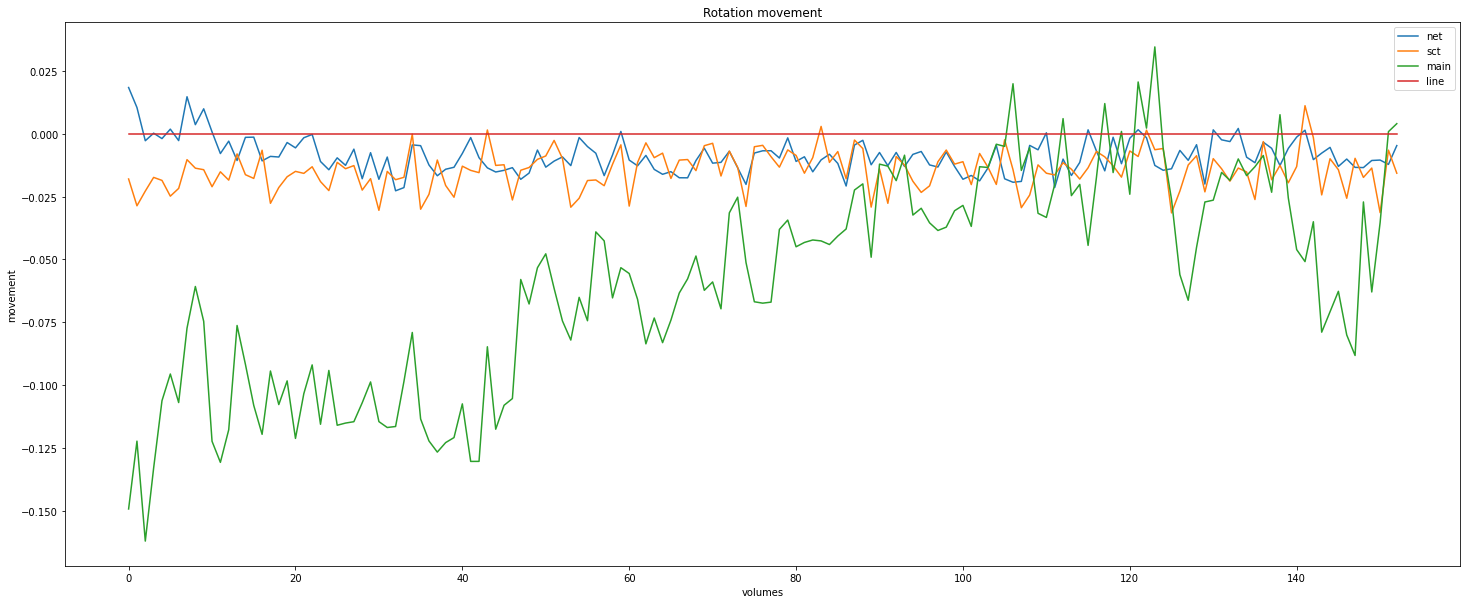

In [16]:

volume=range(int(np.min(osct[:,0]))) 
line=np.zeros(int(np.min(osct[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,valuer_net,label = 'net')
plt.plot(volume,valuer_sct,label = 'sct')
plt.plot(volume,valuer_main,label = 'main')

plt.plot(volume,line,label = 'line')




# naming the x axis
plt.xlabel('volumes')
# naming the y axis
plt.ylabel('movement')
# giving a title to my graph
plt.title('Rotation movement')

# show a legend on the plot
plt.legend()


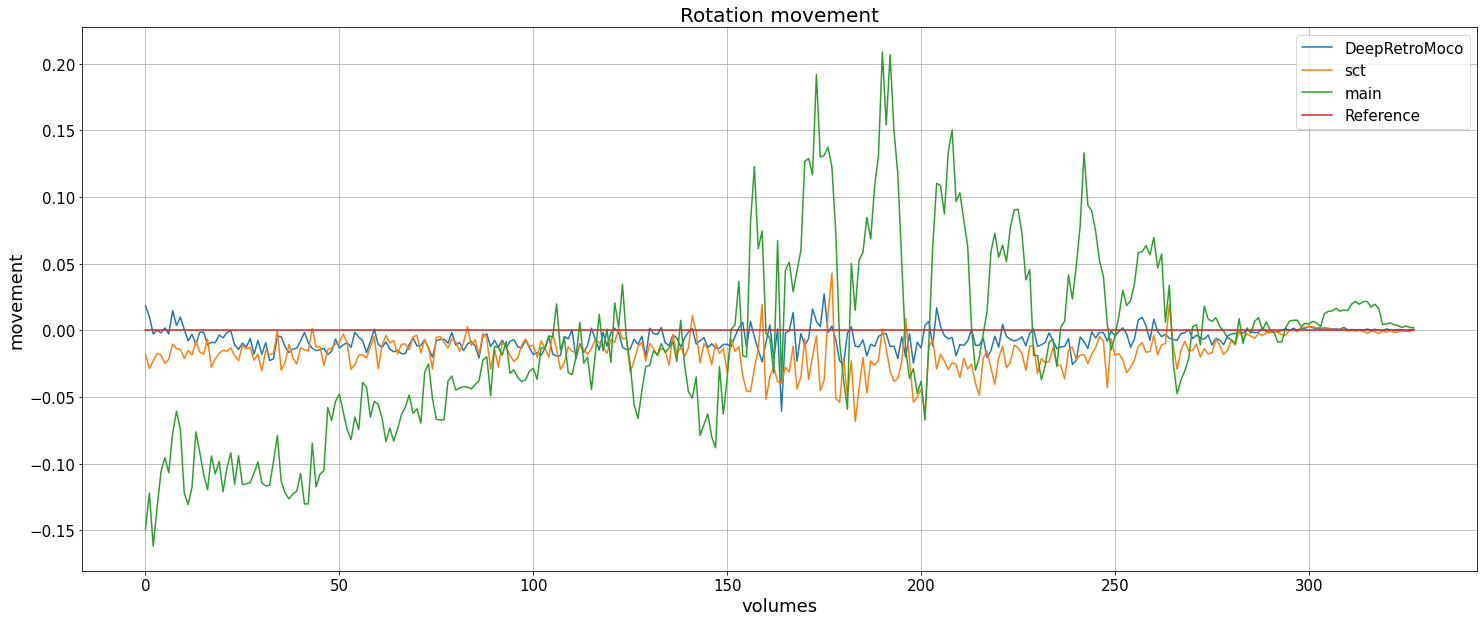

In [57]:
volume=range(int(np.max(osct[:,0]))) 
line=np.zeros(int(np.max(osct[:,0])))
plt.figure(figsize=(25,10))
plt.plot(volume,valuer_net_full,label = 'DeepRetroMoco')
plt.plot(volume,valuer_sct_full,label = 'sct')
plt.plot(volume,valuer_main_full,label = 'main')

plt.plot(volume,line,label = 'Reference')



# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('movement',fontsize=18)
# giving a title to my graph
plt.title('Rotation movement',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show a legend on the plot
plt.legend()
plt.grid()
plt.legend(fontsize=15)

In [18]:
count=np.zeros(int(np.max(osct[:,0])))
for i in o[:,0] :
    i=int(i)

    count[0:i]=count[0:i]+1
    

<BarContainer object of 328 artists>

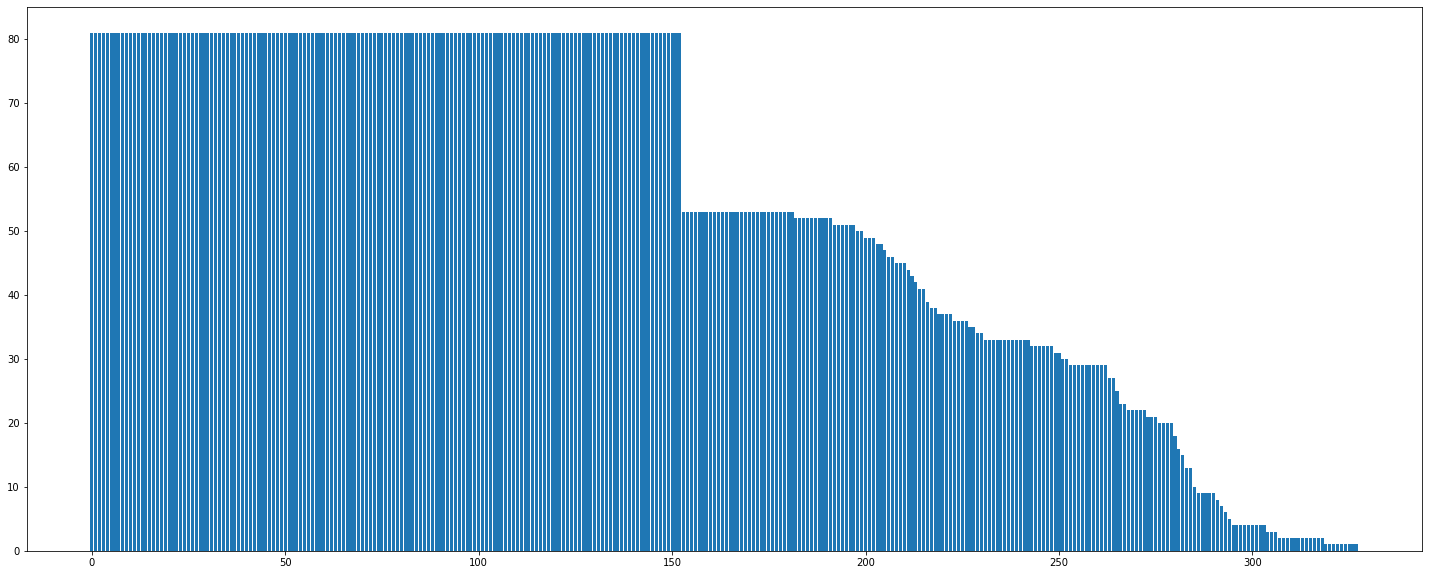

In [19]:
plt.figure(figsize=(25,10))

plt.bar(volume, count)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

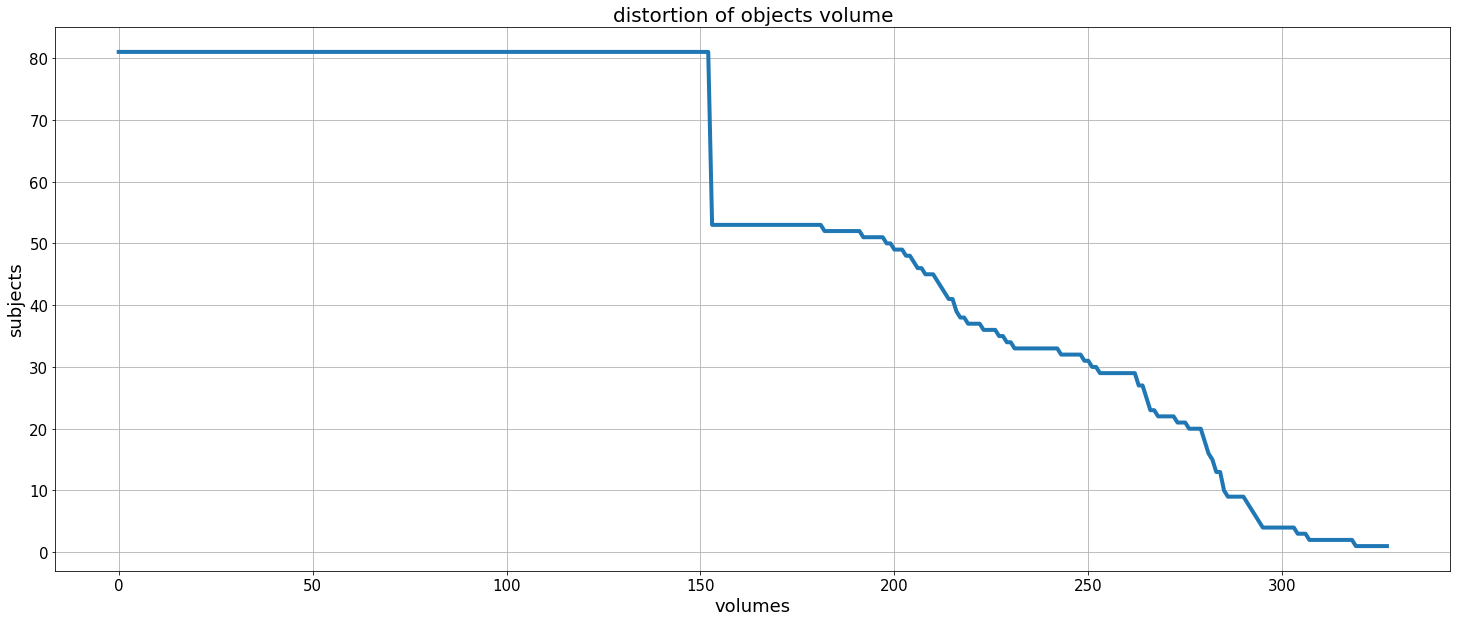

In [52]:
plt.figure(figsize=(25,10))

plt.plot(volume,count,linewidth=4)
plt.grid()
# naming the x axis
plt.xlabel('volumes',fontsize=18)
# naming the y axis
plt.ylabel('subjects',fontsize=18)
# giving a title to my graph
plt.title('distortion of objects volume',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [112]:
from sklearn.metrics import mean_squared_error
  
# Given values
Y_true =np.zeros(int(np.min(osct[:,0])))
  
# Calculation of Mean Squared Error (MSE)
print('net_MSE_tranlation=',mean_squared_error(Y_true,value_net))
print('sct_MSE_tranlation=',mean_squared_error(Y_true,value_sct))
print('main_MSE_tranlation=',mean_squared_error(Y_true,value_main))

net_MSE_tranlation= 9.732224142708975e-08
sct_MSE_tranlation= 1.5937180612236957e-07
main_MSE_tranlation= 1.236401847974059e-06


In [113]:
  
# Given values
Y_true =np.zeros(int(np.min(osct[:,0])))
  
    
# Calculation of Mean Squared Error (MSE)
print('net_MSE_rotation=',mean_squared_error(Y_true,valuer_net))
print('sct_MSE_rotation=',mean_squared_error(Y_true,valuer_sct))
print('main_MSE_rotation=',mean_squared_error(Y_true,valuer_main))

net_MSE_rotation= 0.00012493700671692838
sct_MSE_rotation= 0.0002721483849613841
main_MSE_rotation= 0.005196052052759728


In [114]:
Y_true_full =np.zeros(int(np.max(osct[:,0])))
  
# Calculation of Mean Squared Error (MSE)
print('net_MSE_tranlation=',mean_squared_error(Y_true_full,value_net_full))
print('sct_MSE_tranlation=',mean_squared_error(Y_true_full,value_sct_full))
print('main_MSE_tranlation=',mean_squared_error(Y_true_full,value_main_full))


net_MSE_tranlation= 2.24948125981803e-07
sct_MSE_tranlation= 2.2763622463745826e-07
main_MSE_tranlation= 1.3407639693117706e-06


In [115]:
# Calculation of Mean Squared Error (MSE)
print('net_MSE_rotation=',mean_squared_error(Y_true_full,valuer_net_full))
print('sct_MSE_rotation=',mean_squared_error(Y_true_full,valuer_sct_full))
print('main_MSE_rotation=',mean_squared_error(Y_true_full,valuer_main_full))

net_MSE_rotation= 0.00011342804808646729
sct_MSE_rotation= 0.0004339913752160664
main_MSE_rotation= 0.004496360664726864
